  <tr>
        <td width="60%">
            <img src="data_scraping.png">
        </td>
        <td>
            <div align="center">
                <font size=24px>
                    <b> Step By Step: PlayStation Games Scraper
                    </b>
                </font>
            </div>
        </td>
    </tr>

<img src='site.png'>

<img src='game.png'>

In [1]:
!pip install beautifulsoup4

In [2]:
# libraries for Web Scrapping
import requests
from bs4 import BeautifulSoup

# library for advance string manipulation
import string

# library for data manipulation
import pandas as pd

# library for advance mathematical operations
import numpy as np

# importing os module 
import os 

import urllib.request

# library for progress bar
from tqdm import tqdm

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scrape a single page

<img src='page.png'>

In [3]:
# extract the page as a whole
page = requests.get("https://store.playstation.com/en-in/grid/STORE-MSF75508-FULLGAMES/1")
page

<Response [200]>

In [4]:
# parse the whole page using a html parser
soup = BeautifulSoup(page.content, 'html.parser')
soup

<!DOCTYPE html>

<html dir="ltr">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="" name="description"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="/img/favicons/favicon-797c65013063519546525db9296a4cf3.png" rel="shortcut icon"/>
<link href="/img/favicons/apple-touch-icon-9c19f4a7c74f72244f540112c2a37fec.png" rel="apple-touch-icon"/>
<link href="/img/favicons/apple-touch-icon-72x72-e8cc2aa249e5e2d88b9b7dfe87493977.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/img/favicons/apple-touch-icon-114x114-9c19f4a7c74f72244f540112c2a37fec.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/img/favicons/apple-touch-icon-144x144-8d51bae3c7934c3995a3bcfbb4704d2a.png" rel="apple-touch-icon" sizes="144x144"/>
<meta content="%7B%22sharedNavVersion%22%3A%221.5.7%22%2C%22loadingScreenConfig%22%3A%7B%22enable%22%3Afalse%2C%22durationMs%22%3A2000%2C%22timerStart%22%3Afalse%2C%22loadingScreenStyle%

# Scrape a page using page number (Generalization)

In [5]:
# extract the data for page number 1 only
page_number = 1

# extract the page as a whole
page = requests.get("https://store.playstation.com/en-in/grid/STORE-MSF75508-FULLGAMES/{}".format(page_number))

# parse the whole page using a html parser
soup = BeautifulSoup(page.content, 'html.parser')
# soup

## Extract Images

<img src='image.png'>

In [6]:
# find_all() searches for the all the tags where the class is found and 
# returns a list of all the occurences 

all_images = soup.findAll(class_="product-image__img product-image__img--main")

# find the length of the elements extracted
len(all_images)

30

In [7]:
# all_images

<img src='src.png'>

In [8]:
# get the first html element from the list all_cases
all_images[0].find("img")

<img class="product-image__img product-image__img--product product-image__img-main" onload="this.classList.add('product-image__img-main--show');" src="https://store.playstation.com/store/api/chihiro/00_09_000/container/IN/en/999/EP0082-CUSA18742_00-0000000000000000/1600956898000/image?w=124&amp;h=124&amp;bg_color=000000&amp;opacity=100&amp;_version=00_09_000" srcset="https://store.playstation.com/store/api/chihiro/00_09_000/container/IN/en/999/EP0082-CUSA18742_00-0000000000000000/1600956898000/image?w=186&amp;h=186&amp;bg_color=000000&amp;opacity=100&amp;_version=00_09_000 1.5x, https://store.playstation.com/store/api/chihiro/00_09_000/container/IN/en/999/EP0082-CUSA18742_00-0000000000000000/1600956898000/image?w=248&amp;h=248&amp;bg_color=000000&amp;opacity=100&amp;_version=00_09_000 2x, https://store.playstation.com/store/api/chihiro/00_09_000/container/IN/en/999/EP0082-CUSA18742_00-0000000000000000/1600956898000/image?w=372&amp;h=372&amp;bg_color=000000&amp;opacity=100&amp;_version=

In [9]:
# get the image source link from the first html element
all_images[1].find("img").attrs.get("src")

'https://store.playstation.com/store/api/chihiro/00_09_000/container/IN/en/999/EP0082-CUSA24813_00-BALANWWE00000001/1603199496000/image?w=124&h=124&bg_color=000000&opacity=100&_version=00_09_000'

In [10]:
# write a for loop that appends the image source link from each html element from all_cases into the list 'urls'
urls = []
for index in range(len(all_images)):
    urls.append(all_images[index].findAll("img")[0].attrs.get("src"))

In [11]:
# show the first 5 elements of the list
urls[:5]

['https://store.playstation.com/store/api/chihiro/00_09_000/container/IN/en/999/EP0082-CUSA18742_00-0000000000000000/1600956898000/image?w=124&h=124&bg_color=000000&opacity=100&_version=00_09_000',
 'https://store.playstation.com/store/api/chihiro/00_09_000/container/IN/en/999/EP0082-CUSA24813_00-BALANWWE00000001/1603199496000/image?w=124&h=124&bg_color=000000&opacity=100&_version=00_09_000',
 'https://store.playstation.com/store/api/chihiro/00_09_000/container/IN/en/999/EP0001-CUSA19394_00-MADSTANDARTED000/1600126823000/image?w=124&h=124&bg_color=000000&opacity=100&_version=00_09_000',
 'https://store.playstation.com/store/api/chihiro/00_09_000/container/IN/en/999/EP0001-CUSA19394_00-MADGOLDED0000000/1600132073000/image?w=124&h=124&bg_color=000000&opacity=100&_version=00_09_000',
 'https://store.playstation.com/store/api/chihiro/00_09_000/container/IN/en/999/EP0001-CUSA19394_00-MADULTIMATEED000/1600128431000/image?w=124&h=124&bg_color=000000&opacity=100&_version=00_09_000']

## Extract The Game Title

<img src='title.png'>

In [12]:
# find_all() searches for the all the tags where the class is found and 
# returns a list of all the occurences 

all_titles = soup.findAll(class_="grid-cell__title")

# find the length of the elements extracted
len(all_titles)

30

In [13]:
# an empty list to hold the titles
titles = []

In [14]:
for names in all_titles:
    titles.append(names.text)
    
titles[:5]

['\nNieR Replicant\xa0ver.1.22474487139…\n',
 '\nBALAN WONDERWORLD\n',
 '\nRiders Republic™\n',
 '\nRiders Republic™ Gold Edition\n',
 '\nRiders Republic™ Ultimate Edition\n']

## Extract the Gaming Console Type

<img src='left.png'>

In [15]:
# find_all() searches for the all the tags where the class is found and 
# returns a list of all the occurences 
detail1 = soup.findAll(class_="grid-cell__left-detail grid-cell__left-detail--detail-1")
detail2 = soup.findAll(class_="grid-cell__left-detail grid-cell__left-detail--detail-2")

# find the length of the elements extracted
print(len(detail1))
print(len(detail2))

30
30


In [16]:
# get the text from the first element
detail1[0].text

'PS4'

In [17]:
# get the text from the first element
detail2[0].text

'Full Game'

In [18]:
# an empty list to hold the console names
consoles = []

In [19]:
for index in range(len(detail1)):
    c_name = detail2[index].text + '-' + detail1[index].text
    consoles.append(c_name)
    
consoles[:10]

['Full Game-PS4',
 'Full Game-PS4',
 'Bundle-PS4',
 'Bundle-PS4',
 'Bundle-PS4',
 'Bundle-PS4',
 'Bundle-PS4',
 'Bundle-PS4',
 'Full Game-PS4',
 'Full Game-PS4']

## Extract the Price of the Game

<img src='price.png'>

In [20]:
# find_all() searches for the all the tags where the class is found and 
# returns a list of all the occurences 
all_prices = soup.findAll(class_="price-display__price")

# find the length of the elements extracted
print(len(all_prices))

30


In [21]:
# get the text from the first element
all_prices[0].text

'Rs\xa03,499'

In [22]:
# an empty list to hold the prices
prices = []

In [23]:
for price in all_prices:
    prices.append(price.text)
    
prices[:5]

['Rs\xa03,499', 'Rs\xa03,499', 'Rs\xa03,999', 'Rs\xa06,499', 'Rs\xa07,149']

In [24]:
all_links = soup.find_all(class_="grid-cell grid-cell--game")
len(all_links)

30

In [25]:

for a in all_links:
    name = a.findAll('a', class_='internal-app-link ember-view')
    print(name[0].get('href'))

/en-in/product/EP0082-CUSA18742_00-0000000000000000
/en-in/product/EP0082-CUSA24813_00-BALANWWE00000001
/en-in/product/EP0001-CUSA19394_00-MADSTANDARTED000
/en-in/product/EP0001-CUSA19394_00-MADGOLDED0000000
/en-in/product/EP0001-CUSA19394_00-MADULTIMATEED000
/en-in/product/EP0001-CUSA15778_00-FC6EDITIONGOLD00
/en-in/product/EP0001-CUSA15778_00-FC6EDSTANDARD000
/en-in/product/EP0001-CUSA15778_00-FC6EDULTIMATE000
/en-in/product/EP0082-CUSA07371_00-OUTRIDERS0000000
/en-in/product/EP0001-CUSA18532_00-POPSOTREMAKE2020
/en-in/product/EP3969-CUSA18210_00-0000000H3PREDELX
/en-in/product/EP3969-CUSA18210_00-00000H3PRESTANDA
/en-in/product/EP0082-CUSA19120_00-0000000000000000
/en-in/product/EP0001-CUSA16345_00-GAME000000000000
/en-in/product/EP0001-CUSA16345_00-EDITIONGOLD00000
/en-in/product/EP4139-CUSA17732_00-EOSDELUXEPREEU01
/en-in/product/EP4139-CUSA17732_00-EOSPREMIUMPREEU1
/en-in/product/EP4139-CUSA17732_00-EOSSTANDARDPREEU
/en-in/product/EP4492-CUSA17052_00-SAKUNA0000000000
/en-in/produ

# Complete Code To Sail Through All The Pages

#### Get the total pages required to parse

In [26]:
# extract the page as a whole
get_page_numbers = requests.get("https://store.playstation.com/en-in/grid/STORE-MSF75508-FULLGAMES/1")

# parse the whole page using a html parser
soup_page_numbers = BeautifulSoup(page.content, 'html.parser')
# soup

In [27]:
# find_all() searches for the all the tags where the class "gallery-mosaic-asset__figure" is found and 
# returns a list of all the occurences 
all_nos = soup.findAll(class_="grid-header__left")

# find the length of the elements extracted
len(all_nos)

1

In [28]:
all_nos[0].text.replace('\n','').split(' ')[0].split('-')[1]

'30'

In [29]:
cells_per_page = all_nos[0].text.replace('\n','').split(' ')[0].split('-')[1]
cells_per_page

'30'

In [30]:
total_cells = all_nos[0].text.replace('\n','').split(' ')[2]
total_cells

'7378'

In [31]:
import math

In [32]:
total_pages = math.ceil(int(total_cells) / int(cells_per_page))
total_pages

246

### Let's construct a complete code

In [33]:
# an empty list to hold the urls
urls = []
# an empty list to hold the titles
titles = []
# an empty list to hold the console names
content_type = []
# an empty list to hold the device names
device = []
# an empty list to hold the prices
prices = []
# an empty list to hold the links
links = []

for page_number in range(1, 2):
    
    # extract the page as a whole
    page = requests.get("https://store.playstation.com/en-in/grid/STORE-MSF75508-FULLGAMES/{}?price=0-99%2C100-149%2C150-249%2C250-499%2C500-749%2C750-1499%2C1500-1999%2C2000-2499%2C2500-*"
                        .format(page_number))

    # parse the whole page using a html parser
    soup = BeautifulSoup(page.content, 'html.parser')

    ########################################################################
    # GET THE GAME TITLES
    ########################################################################
    # find_all() searches for the all the tags where the class is found and 
    # returns a list of all the occurences 
    all_titles = soup.findAll(class_="grid-cell__title")

    # append the data in the list
    for names in tqdm(all_titles):
        titles.append(names.text)
    ########################################################################


    ########################################################################
    # GET THE GAMING CONSOLE TYPE
    ########################################################################
    # find_all() searches for the all the tags where the class is found and 
    # returns a list of all the occurences 
    detail1 = soup.findAll(class_="grid-cell__left-detail grid-cell__left-detail--detail-1")
    detail2 = soup.findAll(class_="grid-cell__left-detail grid-cell__left-detail--detail-2")

    for index in range(len(detail1)):
        device.append(detail1[index].text)
        content_type.append(detail2[index].text)
    ########################################################################


    ########################################################################
    # GET THE PRICES
    ########################################################################
    # find_all() searches for the all the tags where the class is found and 
    # returns a list of all the occurences 
    all_prices = soup.findAll(class_="price-display__price")

    for price in all_prices:
        prices.append(price.text)

    ########################################################################


    ########################################################################
    # GET THE GAME IMAGES URL
    ########################################################################
    # find_all() searches for the all the tags where the class is found and 
    # returns a list of all the occurences 
    all_images = soup.findAll(class_="product-image__img product-image__img--main")

    # write a for loop that appends the image source link from each html element from all_cases into the list 'urls'
    for index in range(len(all_images)):
        urls.append(all_images[index].find("img").attrs.get("src"))


    ########################################################################
    
    
    ########################################################################
    # GET THE LINKS
    ########################################################################
    all_links = soup.find_all(class_="grid-cell grid-cell--game")
    len(all_links)
    for a in all_links:
        link = a.findAll('a', class_='internal-app-link ember-view')
        links.append('https://store.playstation.com/' + link[0].get('href'))
        

    print("Page {} scraped".format(page_number))

100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 29739.81it/s]

Page 1 scraped


In [34]:
len(prices)

30

In [35]:
len(device)

30

In [36]:
len(content_type)

30

In [37]:
len(links)

30

In [38]:
# create a dataframe using the above lists
df_playstation = pd.DataFrame( {'Title': titles, 
                               'Content_Type': content_type,
                               'Device': device,
                               'Price': prices, 
                               'Image_URL': urls,
                               'Links': links} )

In [39]:
# display the first 5 observations
df_playstation.head()

,Title,Content_Type,Device,Price,Image_URL,Links
0,\nNieR Replicant ver.1.22474487139…\n,Full Game,PS4,"Rs 3,499",https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...
1,\nBALAN WONDERWORLD\n,Full Game,PS4,"Rs 3,499",https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...
2,\nRiders Republic™\n,Bundle,PS4,"Rs 3,999",https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...
3,\nRiders Republic™ Gold Edition\n,Bundle,PS4,"Rs 6,499",https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...
4,\nRiders Republic™ Ultimate Edition\n,Bundle,PS4,"Rs 7,149",https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...


In [40]:
# clean the column 'Title'
df_playstation.Title = df_playstation.Title.str.replace('\n', '')

In [41]:
# clean the column 'Price'
df_playstation.Price = df_playstation.Price.str.replace('Rs', '')
df_playstation.Price = df_playstation.Price.str.replace(',','')
df_playstation.Price = df_playstation.Price.str.strip()

In [42]:
# display the first 5 observations
df_playstation.head()

,Title,Content_Type,Device,Price,Image_URL,Links
0,NieR Replicant ver.1.22474487139…,Full Game,PS4,3499,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...
1,BALAN WONDERWORLD,Full Game,PS4,3499,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...
2,Riders Republic™,Bundle,PS4,3999,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...
3,Riders Republic™ Gold Edition,Bundle,PS4,6499,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...
4,Riders Republic™ Ultimate Edition,Bundle,PS4,7149,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...


In [43]:
df_playstation.Links[0]

'https://store.playstation.com//en-in/product/EP0082-CUSA18742_00-0000000000000000'

In [44]:
# an empty list to hold the ratings
ratings = []

for l in range(len(links)):
    
    # extract the page as a whole
    page = requests.get(links[l])

    # parse the whole page using a html parser
    soup = BeautifulSoup(page.content, 'html.parser')

    ########################################################################
    # GET THE GAME RATINGS
    ########################################################################
    try:
        rats = soup.find(class_="provider-info__rating-count")
        print(rats.text)
        ratings.append(rats.text)
    except:
        ratings.append('')


                  14 Ratings
                

                  1 Ratings
                

                  5 Ratings
                

                  1 Ratings
                

                  3 Ratings
                

                  3 Ratings
                

                  20 Ratings
                

                  21 Ratings
                

                  30 Ratings
                

                  54 Ratings
                

                  13 Ratings
                

                  6 Ratings
                

                  3 Ratings
                

                  4 Ratings
                

                  1 Ratings
                

                  1 Ratings
                

                  1 Ratings
                

                  326 Ratings
                

                  838 Ratings
                

                  449 Ratings
                

                  92 Ratings
                

                  12

In [45]:
df_playstation['Ratings'] = ratings
df_playstation.head()

,Title,Content_Type,Device,Price,Image_URL,Links,Ratings
0,NieR Replicant ver.1.22474487139…,Full Game,PS4,3499,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,\n 14 Ratings\n
1,BALAN WONDERWORLD,Full Game,PS4,3499,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,\n 1 Ratings\n
2,Riders Republic™,Bundle,PS4,3999,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,\n 5 Ratings\n
3,Riders Republic™ Gold Edition,Bundle,PS4,6499,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,\n 1 Ratings\n
4,Riders Republic™ Ultimate Edition,Bundle,PS4,7149,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,\n 3 Ratings\n


In [53]:
for i in range(df_playstation.shape[0]):
    try:
        df_playstation['Ratings'][i] = df_playstation['Ratings'][i].replace('\n','').split()[0]
    except:
        df_playstation['Ratings'][i] = ''

In [47]:
df_playstation

,Title,Content_Type,Device,Price,Image_URL,Links,Ratings
0,NieR Replicant ver.1.22474487139…,Full Game,PS4,3499,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,14
1,BALAN WONDERWORLD,Full Game,PS4,3499,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,1
2,Riders Republic™,Bundle,PS4,3999,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,5
3,Riders Republic™ Gold Edition,Bundle,PS4,6499,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,1
4,Riders Republic™ Ultimate Edition,Bundle,PS4,7149,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,3
5,FAR CRY®6 Gold Edition,Bundle,PS4,6499,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,3
6,FAR CRY®6 Standard Edition,Bundle,PS4,3999,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,20
7,Far Cry 6 Ultimate Edition,Bundle,PS4,7149,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,21
8,OUTRIDERS,Full Game,PS4,3999,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,
9,Prince of Persia: The Sands of Time Remake,Full Game,PS4,2499,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,30


## Quick Analysis

In [48]:
plt.rcParams["figure.figsize"] = (15,8)    

### CountPlot - Univariate Analysis

Bundle       19
Full Game    11
Name: Content_Type, dtype: int64


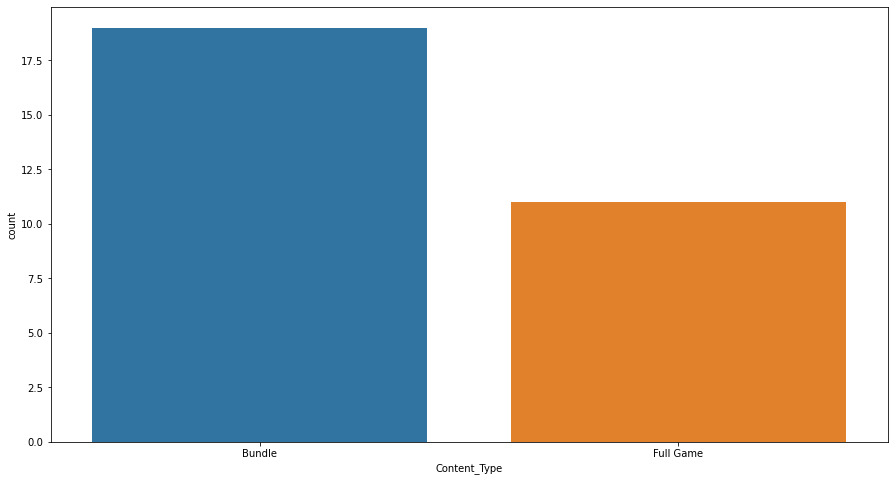

In [54]:
# count the number of games for each console type
print(df_playstation.Content_Type.value_counts())

# display a countplot
sns.countplot(df_playstation['Content_Type'], data = df_playstation)

In [50]:
# find the top 5 expensive games
df_playstation = df_playstation.sort_values('Price', ascending=False).reset_index(drop=True)
df_playstation.head()

,Title,Content_Type,Device,Price,Image_URL,Links,Ratings
0,Riders Republic™ Ultimate Edition,Bundle,PS4,7149,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,3
1,Far Cry 6 Ultimate Edition,Bundle,PS4,7149,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,21
2,Riders Republic™ Gold Edition,Bundle,PS4,6499,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,1
3,FAR CRY®6 Gold Edition,Bundle,PS4,6499,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,3
4,IMMORTALS FENYX RISING - GOLD EDITION,Bundle,PS4,6499,https://store.playstation.com/store/api/chihir...,https://store.playstation.com//en-in/product/E...,4


### BarPlot - Bivariate Analysis

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

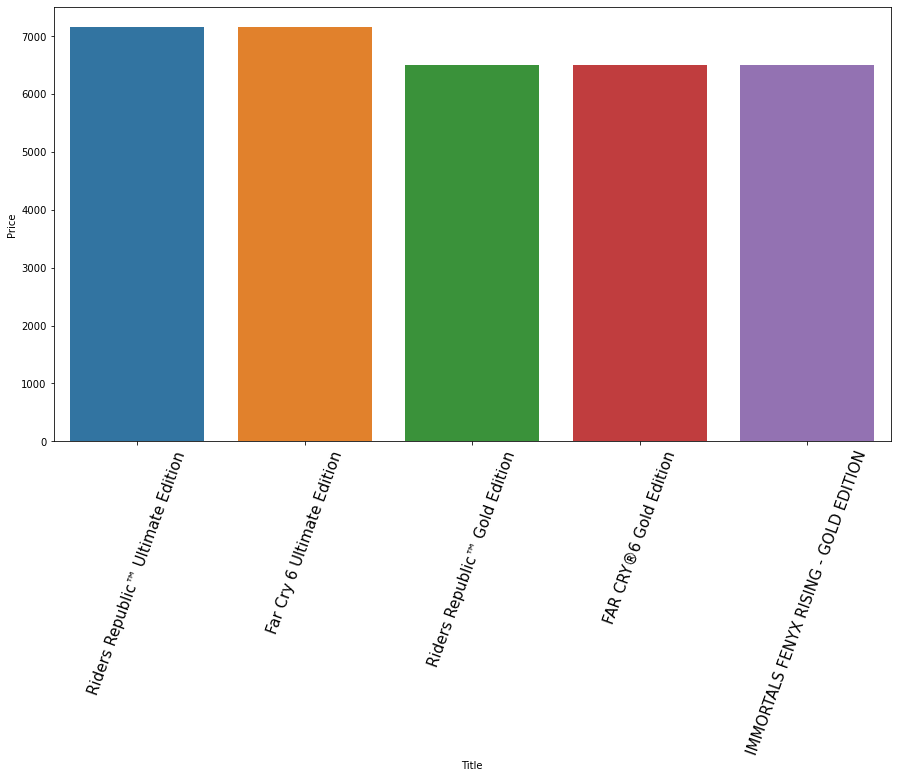

In [55]:
sns.barplot(x = 'Title', y = 'Price', data = df_playstation.head())
plt.xticks(rotation = 70, fontsize=15)